In [ ]:
## Kevin

In [1]:
pip install google-api-python-client

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install isodate

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies
import pandas as pd
import requests
import json
from matplotlib import pyplot as plt
from googleapiclient.discovery import build
import isodate

# Import the API key
from config import api_key

# Initialize YouTube Data API v3
youtube = build('youtube', 'v3', developerKey=api_key)

# Define the region codes for US(United States), GB(United Kingdom), and CA(Canada)
regions = {
    "US": "United States",
    "GB": "United Kingdom",
    "CA": "Canada"
}

def get_video_category(category_id):

    request = youtube.videoCategories().list(
        part="snippet",
        id=category_id
    )
    response = request.execute()
    category_name = response["items"][0]["snippet"]["title"]
    return category_name

def format_duration(duration):
    
    duration_obj = isodate.parse_duration(duration)
    minutes = duration_obj.total_seconds() // 60
    seconds = duration_obj.total_seconds() % 60
    return f"{int(minutes)}m {int(seconds)}s"
    
def get_trending_videos(region_code):
    # Call the API to get the top trending videos
    request = youtube.videos().list(
        part="snippet,statistics,contentDetails",
        chart="mostPopular",
        regionCode=region_code,
        maxResults=100
    )
    response = request.execute()

    # Extract video information
    videos = []
    for item in response["items"]:
        try:
            video_id = item["id"]
            video_title = item["snippet"]["title"]
            video_category_id = item["snippet"]["categoryId"]
            video_category_name = get_video_category(video_category_id)
            video_views = item["statistics"]["viewCount"]
            video_likes = item["statistics"]["likeCount"]
            video_comments = item["statistics"]["commentCount"]
            video_duration = format_duration(item["contentDetails"]["duration"])
            videos.append({
                "id": video_id,
                "title": video_title,
                "category": video_category_name,
                "views": video_views,
                "likes": video_likes,
                "comments": video_comments,
                "duration": video_duration
            })
        except Exception as e:
            print(f"Error processing video: {e} for {region_code}")
    return videos


# Get trending videos for each region
for region_code, region_name in regions.items():
    print(f"\nTop Trending Videos in {region_name}:")
    trending_videos = get_trending_videos(region_code)
    for video in trending_videos:
        print(f"Title: {video['title']}")
        print(f"Video ID: {video['id']}")
        print(f"Category: {video['category']}")
        print(f"Views: {video['views']}")
        print(f"Likes: {video['likes']}")
        print(f"Comments: {video['comments']}")
        print(f"Duration: {video['duration']}")
        print("-" * 30)

for region_code, region_name in regions.items():
    trending_videos = get_trending_videos(region_code)
    df = pd.DataFrame(trending_videos)
    file_name = f"trending_videos_{region_name}.csv"
    df.to_csv(file_name, index=False)
    print(f"Trending videos for {region_name} exported to {file_name}")


Top Trending Videos in United States:
Error processing video: 'viewCount' for US
Error processing video: 'viewCount' for US
Error processing video: 'likeCount' for US
Error processing video: 'viewCount' for US
Title: Tom MacDonald - "God Mode"
Video ID: YyAumYg5Hxc
Category: People & Blogs
Views: 876065
Likes: 133179
Comments: 27919
Duration: 8m 25s
------------------------------
Title: Sabrina Carpenter - Espresso (Official Video)
Video ID: eVli-tstM5E
Category: Music
Views: 2079425
Likes: 194886
Comments: 7191
Duration: 3m 21s
------------------------------
Title: I Ran A Custom Croissant Shop For A Day
Video ID: TYX3wGsKpwI
Category: People & Blogs
Views: 577413
Likes: 41066
Comments: 1518
Duration: 36m 17s
------------------------------
Title: Conan O'Brien Needs a Doctor While Eating Spicy Wings | Hot Ones
Video ID: FALlhXl6CmA
Category: Entertainment
Views: 4159459
Likes: 286469
Comments: 30528
Duration: 27m 21s
------------------------------
Title: Fuerza Regida - CRAZYZ (Offic

In [26]:
## Sophia
#Getting the statistical measures for the trending YouTube Videos.

In [65]:
#Reading each of the CSV files:
import numpy as np
trending_videos_ca = pd.read_csv('trending_videos_Canada.csv')
trending_videos_us = pd.read_csv('trending_videos_United States.csv')
trending_videos_gb = pd.read_csv('trending_videos_United Kingdom.csv')

In [66]:
# Defining columns and dictionary to store statistics for each region and column
#For Canada
numerical_columns = ['views', 'comments']
ca_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_ca[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)

        # Creating dictionary with our statistics
    ca_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for Canada:')
for column, stats in ca_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
ca_stats_df = pd.DataFrame(ca_stats)

Statistics for Canada:

views:
Mean: 1887612.56
Median: 767339.5
Variance: 15746306766777.41
Std. Deviation: 3968161.64
Std. Error: 561182.8
------------------------------

comments:
Mean: 7153.56
Median: 2331.5
Variance: 295122642.69
Std. Deviation: 17179.13
Std. Error: 2429.5
------------------------------


In [68]:
#For USA 
numerical_columns = ['views', 'comments']
us_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_us[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)


        # Creating dictionary with our statistics
    us_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for the United States:')
for column, stats in us_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
us_stats_df = pd.DataFrame(us_stats)

Statistics for the United States:

views:
Mean: 1570787.87
Median: 628325.0
Variance: 14939668338083.2
Std. Deviation: 3865186.71
Std. Error: 569890.69
------------------------------

comments:
Mean: 4542.41
Median: 2225.5
Variance: 59120265.11
Std. Deviation: 7688.97
Std. Error: 1133.68
------------------------------


In [76]:
#For United Kingdom
numerical_columns = ['views', 'comments']
gb_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_gb[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)

        # Creating dictionary with our statistics
    gb_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for the United Kingdom:')
for column, stats in us_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
gb_stats_df = pd.DataFrame(gb_stats)

Statistics for the United Kingdom:

views:
Mean: 1570787.87
Median: 628325.0
Variance: 14939668338083.2
Std. Deviation: 3865186.71
Std. Error: 569890.69
------------------------------

comments:
Mean: 4542.41
Median: 2225.5
Variance: 59120265.11
Std. Deviation: 7688.97
Std. Error: 1133.68
------------------------------


In [75]:
print("Statistics without scientific notation:")
print(all_means.applymap(lambda x: '{:,.2f}'.format(x)))

Statistics without scientific notation:
                        Canada         United States        United Kingdom
views     3,149,262,790,214.87  2,987,934,994,454.69  3,430,198,039,743.57
comments         59,030,347.36         11,827,171.13         57,170,749.71


C:\Users\sophi\AppData\Local\Temp\ipykernel_7068\1145856645.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(all_means.applymap(lambda x: '{:,.2f}'.format(x)))


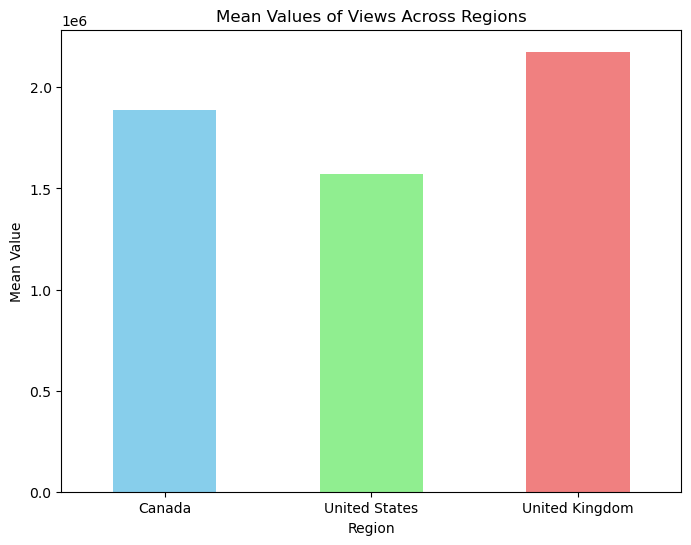

In [115]:
views_means = pd.Series({
    'Canada': ca_stats_df.loc['Mean']['views'],
    'United States': us_stats_df.loc['Mean']['views'],
    'United Kingdom': gb_stats_df.loc['Mean']['views']
})
#note: These numbers are in scientific notation due to the large number of views
plt.figure(figsize=(8, 6))
views_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean Values of Views Across Regions')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

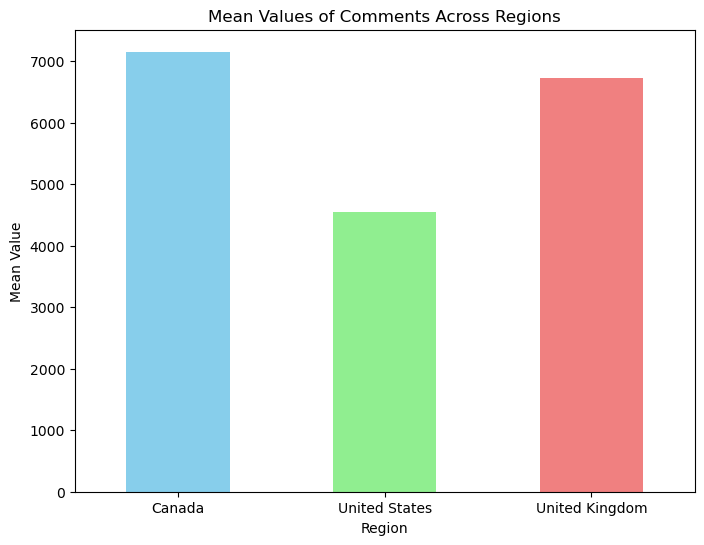

In [114]:
views_means = pd.Series({
    'Canada': ca_stats_df.loc['Mean']['comments'],
    'United States': us_stats_df.loc['Mean']['comments'],
    'United Kingdom': gb_stats_df.loc['Mean']['comments']
})

plt.figure(figsize=(8, 6))
views_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean Values of Comments Across Regions')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## Juan

In [ ]:
## Amanda
# Compare and contrast by region

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
trending_US = pd.read_csv("trending_videos_United States.csv")
trending_UK = pd.read_csv('trending_videos_United Kingdom.csv')
trending_CA = pd.read_csv('trending_videos_Canada.csv')
trending_df = pd.concat([trending_UK,trending_CA,trending_US])
trending_df.head()

,id,title,category,views,likes,comments,duration
0,eVli-tstM5E,Sabrina Carpenter - Espresso (Official Video),Music,2079425,194896,7191,3m 21s
1,U4JYAx5rNRA,Bridgerton Season 3 | Official Trailer | Netflix,Entertainment,3823180,147618,6175,2m 48s
2,5VFLKunsQqo,I DESTROYED A ROLLS ROYCE TO REBUILD MARCUS RA...,Autos & Vehicles,1770364,65676,3756,23m 0s
3,a9cyG_yfh1k,Dua Lipa - Illusion (Official Music Video),Music,4509031,252238,13452,3m 7s
4,lbPJXWDa6oM,Why We Left Car Throttle,People & Blogs,163093,20916,1703,4m 3s


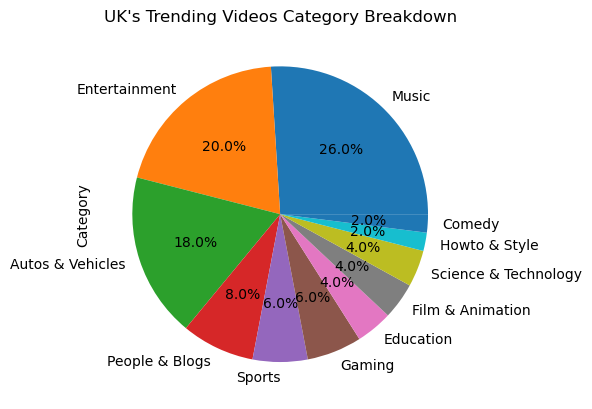

In [74]:
#Pie chart of trending video category breakdown for the UK
category_count_uk = trending_UK['category'].value_counts()
category_labels_uk = trending_UK['category'].unique().tolist()
plt.pie(category_count_uk, labels=category_labels_uk, autopct='%1.1f%%')
plt.ylabel("Category")
plt.title("UK's Trending Videos Category Breakdown")
plt.show()

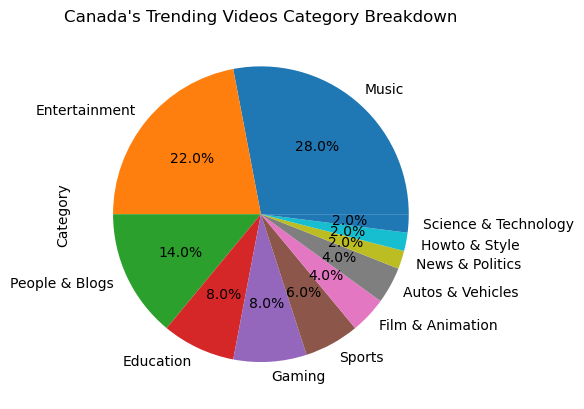

In [75]:
#Pie chart of trending video category breakdown for Canada
category_count_ca = trending_CA['category'].value_counts()
category_labels_ca = trending_CA['category'].unique().tolist()
plt.pie(category_count_ca, labels=category_labels_ca, autopct='%1.1f%%')
plt.ylabel("Category")
plt.title("Canada's Trending Videos Category Breakdown")
plt.show()

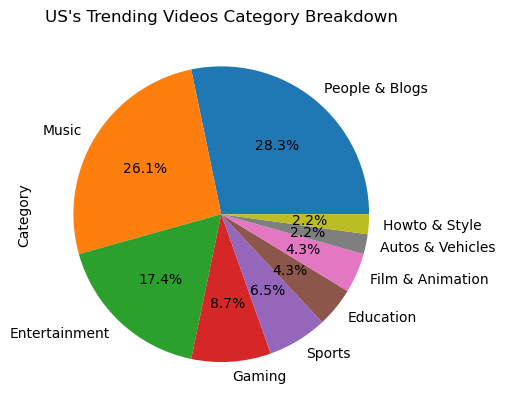

In [76]:
#Pie chart of trending video category breakdown for the US
category_count_us = trending_US['category'].value_counts()
category_labels_us = trending_US['category'].unique().tolist()
plt.pie(category_count_us, labels=category_labels_us, autopct='%1.1f%%')
plt.ylabel("Category")
plt.title("US's Trending Videos Category Breakdown")
plt.show()

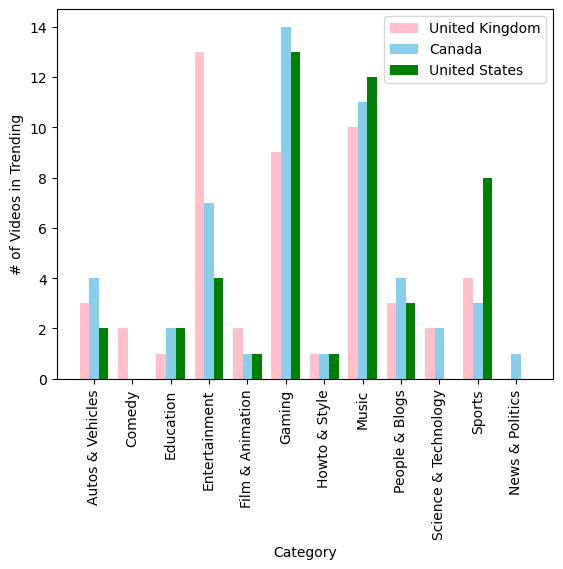

In [73]:
#grouped bar graph of # of videos of each category by region
category_values_gb = trending_UK['category'].value_counts().sort_index()
category_values_ca = trending_CA['category'].value_counts().sort_index()
category_values_us = trending_US['category'].value_counts().sort_index()
#combine and fill
category_values_combined = pd.concat([category_values_gb,category_values_ca,category_values_us], axis=1).fillna(0)
category_values_combined.columns=["United Kingdom","Canada","United States"]

#plot
bar_width = 0.25
x = range(len(category_values_combined.index))
plt.bar(x, category_values_combined['United Kingdom'], width=bar_width, color='pink', align='center', label='United Kingdom')
plt.bar([i + bar_width for i in x], category_values_combined['Canada'], width=bar_width, color='skyblue', align='center', label='Canada')
plt.bar([i + 2 * bar_width for i in x], category_values_combined['United States'], width=bar_width, color='green', align='center', label='United States')
plt.xlabel('Category')
plt.ylabel('# of Videos in Trending')
plt.xticks([i + bar_width for i in x], category_values_combined.index, rotation =90)
plt.legend()
plt.show()

In [34]:
#mapping trending videos based on video length for overall
#separating minutes and seconds
trending_df['duration'] = trending_df['duration'].fillna(0)
trending_df[['minutes', 'seconds']] = trending_df['duration'].str.extract(r'(\d+)m (\d+)s')
#trending_df[['minutes', 'seconds']] = trending_df[['minutes', 'seconds']].fillna(0)
# Convert minutes and seconds columns to integers
trending_df['minutes'] = trending_df['minutes'].astype(int)
trending_df['seconds'] = trending_df['seconds'].astype(int)
trending_df.head()

,id,title,category,views,likes,comments,duration,minutes,seconds
0,eVli-tstM5E,Sabrina Carpenter - Espresso (Official Video),Music,2079425,194896,7191,3m 21s,3,21
1,U4JYAx5rNRA,Bridgerton Season 3 | Official Trailer | Netflix,Entertainment,3823180,147618,6175,2m 48s,2,48
2,5VFLKunsQqo,I DESTROYED A ROLLS ROYCE TO REBUILD MARCUS RA...,Autos & Vehicles,1770364,65676,3756,23m 0s,23,0
3,a9cyG_yfh1k,Dua Lipa - Illusion (Official Music Video),Music,4509031,252238,13452,3m 7s,3,7
4,lbPJXWDa6oM,Why We Left Car Throttle,People & Blogs,163093,20916,1703,4m 3s,4,3


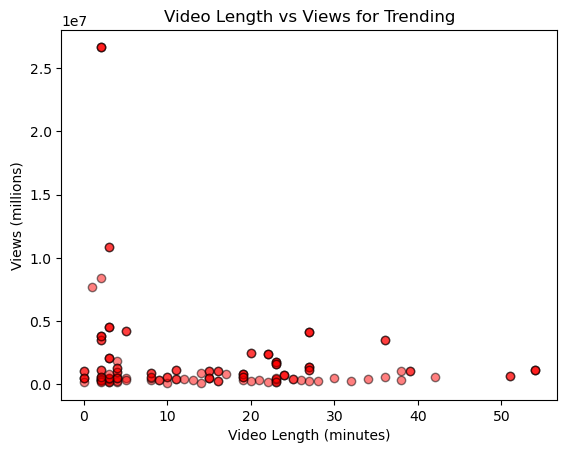

In [42]:
#plotting
x_limit = 60
x_axis = trending_df['minutes']
y_axis = trending_df['views']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.5)
plt.xlabel("Video Length (minutes)")
plt.ylabel("Views (millions)")
plt.title("Video Length vs Views for Trending")
plt.show()

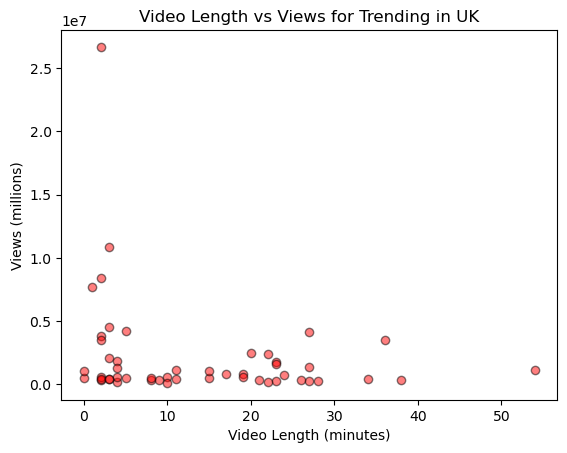

In [43]:
# for UK
#separating minutes and seconds
trending_UK['duration'] = trending_UK['duration'].fillna(0)
trending_UK[['minutes', 'seconds']] = trending_UK['duration'].str.extract(r'(\d+)m (\d+)s')
# Convert minutes and seconds columns to integers
trending_UK['minutes'] = trending_UK['minutes'].astype(int)
trending_UK['seconds'] = trending_UK['seconds'].astype(int)

#plotting
x_limit = 60
x_axis_uk = trending_UK['minutes']
y_axis_uk = trending_UK['views']
plt.scatter(x_axis_uk, y_axis_uk, marker="o", facecolors="red", edgecolors="black", alpha=0.5)
plt.xlabel("Video Length (minutes)")
plt.ylabel("Views (millions)")
plt.title("Video Length vs Views for Trending in UK")
plt.show()

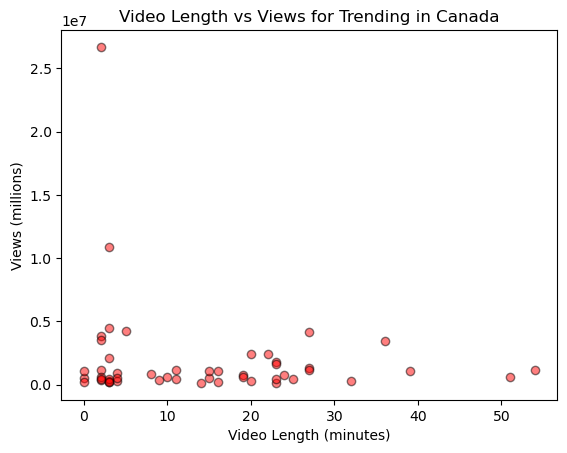

In [45]:
#for Canada
#separating minutes and seconds
trending_CA['duration'] = trending_CA['duration'].fillna(0)
trending_CA[['minutes', 'seconds']] = trending_CA['duration'].str.extract(r'(\d+)m (\d+)s')
# Convert minutes and seconds columns to integers
trending_CA['minutes'] = trending_CA['minutes'].astype(int)
trending_CA['seconds'] = trending_CA['seconds'].astype(int)

#plotting
x_limit = 60
x_axis_ca = trending_CA['minutes']
y_axis_ca = trending_CA['views']
plt.scatter(x_axis_ca, y_axis_ca, marker="o", facecolors="red", edgecolors="black", alpha=0.5)
plt.xlabel("Video Length (minutes)")
plt.ylabel("Views (millions)")
plt.title("Video Length vs Views for Trending in Canada")
plt.show()

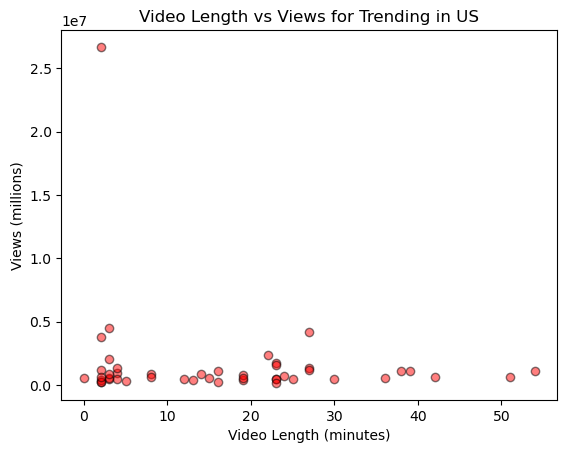

In [47]:
#for US
#separating minutes and seconds
trending_US['duration'] = trending_US['duration'].fillna(0)
trending_US[['minutes', 'seconds']] = trending_US['duration'].str.extract(r'(\d+)m (\d+)s')
# Convert minutes and seconds columns to integers
trending_US['minutes'] = trending_US['minutes'].astype(int)
trending_US['seconds'] = trending_US['seconds'].astype(int)

#plotting
x_limit = 60
x_axis_us = trending_US['minutes']
y_axis_us = trending_US['views']
plt.scatter(x_axis_us, y_axis_us, marker="o", facecolors="red", edgecolors="black", alpha=0.5)
plt.xlabel("Video Length (minutes)")
plt.ylabel("Views (millions)")
plt.title("Video Length vs Views for Trending in US")
plt.show()

In [ ]:
## Shameer